In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
import collections
import collections.abc
collections.MutableMapping = collections.abc.MutableMapping


In [10]:
# Install Magnitude on Google Colab
! echo "Installing Magnitude.... (please wait, can take a while)"
! (curl https://raw.githubusercontent.com/plasticityai/magnitude/master/install-colab.sh | /bin/bash 1>/dev/null 2>/dev/null)
! echo "Done installing Magnitude."

Installing Magnitude.... (please wait, can take a while)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   137  100   137    0     0    525      0 --:--:-- --:--:-- --:--:--   526
Done installing Magnitude.


In [11]:
# Import required libraries
from pymagnitude import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [13]:
model = Magnitude("/content/drive/MyDrive/Colab Notebooks/GoogleNews-vectors-negative300.magnitude")

# Check the dimensionality of the embeddings.
print("Embedding dimensionality:", model.dim)  # Expected output: 300


Embedding dimensionality: 300


In [14]:
# Get the most similar words to "picnic".
similar_words = model.most_similar("picnic", topn=6)
# Exclude "picnic" itself and keep the top 5 similar words.
top5_picnic = [word for word, score in similar_words if word.lower() != "picnic"][:5]
print("Top-5 similar words to 'picnic':", top5_picnic)


Top-5 similar words to 'picnic': ['picnics', 'picnic_lunch', 'potluck_picnic', 'picnic_supper', 'picnicking']


In [15]:
# Define the list of words.
words_list = ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']

# Retrieve vectors for each word.
vectors = np.array([model.query(word) for word in words_list])
# Compute the mean vector.
mean_vector = np.mean(vectors, axis=0)
# Calculate Euclidean distances from each word's vector to the mean vector.
distances = {word: np.linalg.norm(model.query(word) - mean_vector) for word in words_list}
# The odd one out is the word with the largest distance.
odd_one = max(distances, key=distances.get)
print("Odd one out:", odd_one)


Odd one out: tissue


In [16]:
# Solve the analogy: leg is to jump as X is to throw.
# Using vector arithmetic: X ≈ throw - jump + leg
analogy_result = model.most_similar(positive=["throw", "leg"], negative=["jump"], topn=1)
print("Analogy result (X):", analogy_result[0][0])


Analogy result (X): forearm


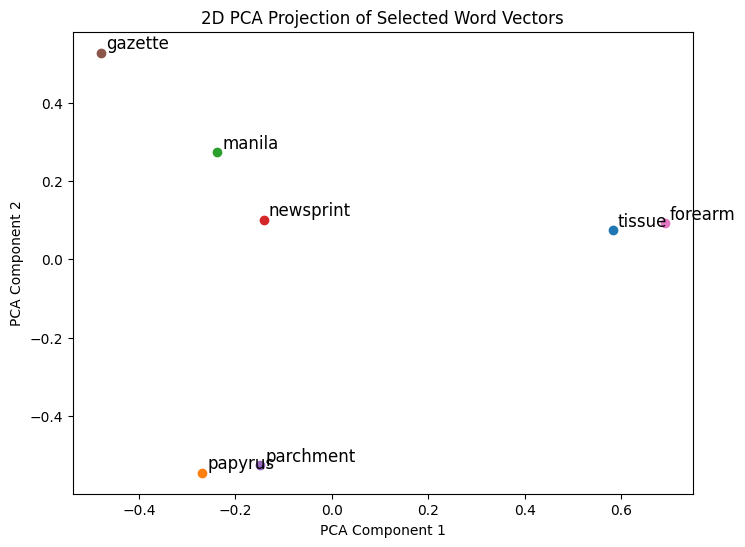

In [17]:
# Combine words for visualization (words from the odd-one-out question and the analogy result).
words_to_plot = words_list + [analogy_result[0][0]]
word_vectors = np.array([model.query(word) for word in words_to_plot])

# Use PCA to reduce dimensions to 2D.
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Create a scatter plot of the reduced word vectors.
plt.figure(figsize=(8, 6))
for i, word in enumerate(words_to_plot):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.01, reduced_vectors[i, 1] + 0.01, word, fontsize=12)
plt.title("2D PCA Projection of Selected Word Vectors")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
